<a href="https://colab.research.google.com/github/JMML2021/Entrega-projecte-final/blob/main/Calculo_Ryainair2019ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importar librerias:

import numpy as np
import matplotlib as plt
import pandas as pd
import csv
import seaborn as sns
import datetime
from datetime import timedelta

import matplotlib.pyplot as plt
 

In [50]:
path= '/content/drive/MyDrive/Ficheros de Vueling/2019RyanairCORTO.xlsx'
path= '/content/drive/MyDrive/Ficheros de Vueling/2019Ryanair.xlsx'

In [51]:
# Abrir fichero de Github. 

Hoja = '2019Ryamair'
df = pd.read_excel(path, sheet_name=Hoja)


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750954 entries, 0 to 750953
Data columns (total 8 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Mes, Día, Año de Flight_Date_Calculated_TST  750954 non-null  object        
 1   scheduled_gate_departure                     750946 non-null  datetime64[ns]
 2   scheduled_gate_arrival                       750951 non-null  datetime64[ns]
 3   actual_gate_departure                        721061 non-null  datetime64[ns]
 4   actual_gate_arrival                          726993 non-null  datetime64[ns]
 5   tail_number                                  746797 non-null  object        
 6   departure_airport_id                         750954 non-null  object        
 7   arrival_at_cd_airport                        746917 non-null  object        
dtypes: datetime64[ns](4), object(4)
memory usage: 45.8+ MB


In [53]:
# Los nombre de las columnas tienen muchos espacios en blanco

nombreColumnas= df.columns
nombreColumnas

Index(['Mes, Día, Año de Flight_Date_Calculated_TST',
       'scheduled_gate_departure', 'scheduled_gate_arrival',
       'actual_gate_departure', 'actual_gate_arrival', 'tail_number',
       'departure_airport_id', 'arrival_at_cd_airport'],
      dtype='object')

In [54]:
# Aqui corrijo los nombre de las columnas
nombreColumnaCorregido= ['DATE', 'STD', 'STA', 'ATD','ATA', 'REG', 'DEP', 'ARR']
 
                         
# Proceso para cambiar el nombre de las columnas por un bucle FOR
for n, m in enumerate(nombreColumnas):
  print(n, m,'*',nombreColumnaCorregido[n],'-')
  df.rename({m: nombreColumnaCorregido[n]}, axis=1, inplace=True)

df.head()

0 Mes, Día, Año de Flight_Date_Calculated_TST * DATE -
1 scheduled_gate_departure * STD -
2 scheduled_gate_arrival * STA -
3 actual_gate_departure * ATD -
4 actual_gate_arrival * ATA -
5 tail_number * REG -
6 departure_airport_id * DEP -
7 arrival_at_cd_airport * ARR -


,DATE,STD,STA,ATD,ATA,REG,DEP,ARR
0,1 de abril de 2019,2019-04-01 10:30:00,2019-04-01 12:50:00,2019-04-01 10:43:00,2019-04-01 12:55:00,EI-DAC,MXP,OTP
1,1 de abril de 2019,2019-04-01 13:20:00,2019-04-01 15:45:00,2019-04-01 13:40:00,2019-04-01 16:03:00,EI-DAC,OTP,MXP
2,1 de abril de 2019,2019-04-01 16:10:00,2019-04-01 18:00:00,2019-04-01 16:40:00,2019-04-01 18:20:00,EI-DAC,MXP,PMO
3,1 de abril de 2019,2019-04-01 18:45:00,2019-04-01 20:35:00,2019-04-01 18:58:00,2019-04-01 20:35:00,EI-DAC,PMO,MXP
4,1 de abril de 2019,2019-04-01 05:30:00,2019-04-01 07:20:00,2019-04-01 05:30:00,2019-04-01 07:25:00,EI-DAD,OPO,BCN


In [55]:
df['MES'] = df['STD'].dt.month
df['Setmana'] = df['STD'].dt.week
df['DiaSetmana'] = df['STD'].dt.dayofweek
df['DiaSetmanaName'] = df['STD'].dt.day_name()
df['Hour'] = df['STD'].dt.hour
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


,DATE,STD,STA,ATD,ATA,REG,DEP,ARR,MES,Setmana,DiaSetmana,DiaSetmanaName,Hour
0,1 de abril de 2019,2019-04-01 10:30:00,2019-04-01 12:50:00,2019-04-01 10:43:00,2019-04-01 12:55:00,EI-DAC,MXP,OTP,4.0,14.0,0.0,Monday,10.0
1,1 de abril de 2019,2019-04-01 13:20:00,2019-04-01 15:45:00,2019-04-01 13:40:00,2019-04-01 16:03:00,EI-DAC,OTP,MXP,4.0,14.0,0.0,Monday,13.0
2,1 de abril de 2019,2019-04-01 16:10:00,2019-04-01 18:00:00,2019-04-01 16:40:00,2019-04-01 18:20:00,EI-DAC,MXP,PMO,4.0,14.0,0.0,Monday,16.0
3,1 de abril de 2019,2019-04-01 18:45:00,2019-04-01 20:35:00,2019-04-01 18:58:00,2019-04-01 20:35:00,EI-DAC,PMO,MXP,4.0,14.0,0.0,Monday,18.0
4,1 de abril de 2019,2019-04-01 05:30:00,2019-04-01 07:20:00,2019-04-01 05:30:00,2019-04-01 07:25:00,EI-DAD,OPO,BCN,4.0,14.0,0.0,Monday,5.0


In [56]:
# Calculo tiempo de vuelo teorico Real y error

df['DuracionVueloTeorico1']= (df['STA'] - df['STD'])/  np.timedelta64(1, 'm') 
df['DuracionVueloReal1'] = (df['ATA'] - df['ATD']) /  np.timedelta64(1, 'm') 
df['E_Duracion_Vuelo1']= df['DuracionVueloReal1']-df['DuracionVueloTeorico1']
df['E_Duracion_Vuelo1'].head(3)

media = round(df['E_Duracion_Vuelo1'].mean(),2)

print('\n\nError medio en tiempo de vuelo',media)



Error medio en tiempo de vuelo -6.24


In [57]:
#Calculo error arrivada:

df['E_Puntualidad1'] = (df['ATA']- df['STA']) /  np.timedelta64(1, 'm')

In [58]:
#Calculo error enlairament:
df['E_Despegue1'] = (df['ATD']- df['STD']) /  np.timedelta64(1, 'm')


## Calcul sequencia del vol per dia

In [82]:
df['Secuencia'] = df.groupby(['DATE', 'REG'])['STD'].rank()
print(df[['Secuencia','REG','STD', 'ARR']][25:45])

    Secuencia     REG                 STD  ARR
25        6.0  EI-DAG 2019-04-01 14:55:00  DUB
26        7.0  EI-DAG 2019-04-01 18:00:00  AMS
27        8.0  EI-DAG 2019-04-01 20:05:00  DUB
28        1.0  EI-DAH 2019-04-01 04:40:00  CGN
29        2.0  EI-DAH 2019-04-01 06:35:00  BGY
30        3.0  EI-DAH 2019-04-01 08:45:00  NAP
31        4.0  EI-DAH 2019-04-01 10:35:00  BGY
32        5.0  EI-DAH 2019-04-01 12:50:00  BRQ
33        6.0  EI-DAH 2019-04-01 14:40:00  BGY
34        7.0  EI-DAH 2019-04-01 16:30:00  CPH
35        8.0  EI-DAH 2019-04-01 18:55:00  BGY
36        1.0  EI-DAI 2019-04-01 04:20:00  ATH
37        2.0  EI-DAI 2019-04-01 06:40:00  CIA
38        3.0  EI-DAI 2019-04-01 09:00:00  CPH
39        4.0  EI-DAI 2019-04-01 11:55:00  CIA
40        5.0  EI-DAI 2019-04-01 15:15:00  MAD
41        6.0  EI-DAI 2019-04-01 18:25:00  CIA
42        1.0  EI-DAJ 2019-04-01 06:50:00  HAM
43        2.0  EI-DAJ 2019-04-01 09:15:00  DUB
44        3.0  EI-DAJ 2019-04-01 14:30:00  AMS


In [60]:
df1=df.copy()
df1.head()

,DATE,STD,STA,ATD,ATA,REG,DEP,ARR,MES,Setmana,DiaSetmana,DiaSetmanaName,Hour,DuracionVueloTeorico1,DuracionVueloReal1,E_Duracion_Vuelo1,E_Puntualidad1,E_Despegue1,Secuencia
0,1 de abril de 2019,2019-04-01 10:30:00,2019-04-01 12:50:00,2019-04-01 10:43:00,2019-04-01 12:55:00,EI-DAC,MXP,OTP,4.0,14.0,0.0,Monday,10.0,140.0,132.0,-8.0,5.0,13.0,1.0
1,1 de abril de 2019,2019-04-01 13:20:00,2019-04-01 15:45:00,2019-04-01 13:40:00,2019-04-01 16:03:00,EI-DAC,OTP,MXP,4.0,14.0,0.0,Monday,13.0,145.0,143.0,-2.0,18.0,20.0,2.0
2,1 de abril de 2019,2019-04-01 16:10:00,2019-04-01 18:00:00,2019-04-01 16:40:00,2019-04-01 18:20:00,EI-DAC,MXP,PMO,4.0,14.0,0.0,Monday,16.0,110.0,100.0,-10.0,20.0,30.0,3.0
3,1 de abril de 2019,2019-04-01 18:45:00,2019-04-01 20:35:00,2019-04-01 18:58:00,2019-04-01 20:35:00,EI-DAC,PMO,MXP,4.0,14.0,0.0,Monday,18.0,110.0,97.0,-13.0,0.0,13.0,4.0
4,1 de abril de 2019,2019-04-01 05:30:00,2019-04-01 07:20:00,2019-04-01 05:30:00,2019-04-01 07:25:00,EI-DAD,OPO,BCN,4.0,14.0,0.0,Monday,5.0,110.0,115.0,5.0,5.0,0.0,1.0


In [61]:
df1=df.copy()
df1.shape

(750954, 19)

In [62]:
AeropuertosCantidad = df1['ARR'].copy()
AeropuertosCantidad['cantitat'] = df1['ARR'].value_counts()
AeropuertosCantidad[1:3]

1    MXP
2    PMO
Name: ARR, dtype: object

In [63]:
AeropuertosCantidad = df1['ARR'].copy()
AeropuertosCantidad=pd.DataFrame(AeropuertosCantidad)
AeropuertosCantidad.columns=(['ARR'])
AeropuertosCantidad = df1['ARR'].value_counts()
AeropuertosCantidad.columns=[ 'ARR', 'Cantidad']
AeropuertosCantidad=pd.DataFrame(AeropuertosCantidad)
AeropuertosCantidad.columns

Index(['ARR'], dtype='object')

In [64]:
AeropuertosCantidad = df1['ARR']
AeropuertosCantidad

0         OTP
1         MXP
2         PMO
3         MXP
4         BCN
         ... 
750949    CTA
750950    SVQ
750951    LGW
750952    SVQ
750953    BRI
Name: ARR, Length: 750954, dtype: object

In [65]:
# Sapigue quants vols han sortit de cada aeroport 
AeropuertosCantidad = df1['ARR']
AeropuertosCantidad['cantitat'] = df1['ARR'].value_counts()

AeropuertosCantidad['cantitat'].sort_values
#AeropuertosCantidad=AeropuertosCantidad.sample(n=6, replace=True)
AeropuertosCantidad.columns=['Aeroport', 'cantitat']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [66]:
AeropuertosCantidad.shape

(750955,)

In [67]:
AeropuertosCantidad.head()

0    OTP
1    MXP
2    PMO
3    MXP
4    BCN
Name: ARR, dtype: object

In [68]:
# Filtre primer enlairament a BArcelona

vuelosPrimerDespegue= ((df1['Secuencia']== 1) & (df1['DEP']=='BCN'))
df2 = df1[vuelosPrimerDespegue]
print(df2[['DATE','REG', 'Secuencia','STD']][0:8])

                    DATE     REG  Secuencia                 STD
193   1 de abril de 2019  EI-DHF        1.0 2019-04-01 04:05:00
214   1 de abril de 2019  EI-DHR        1.0 2019-04-01 04:00:00
294   1 de abril de 2019  EI-DLJ        1.0 2019-04-01 04:15:00
528   1 de abril de 2019  EI-DWM        1.0 2019-04-01 04:20:00
774   1 de abril de 2019  EI-EBW        1.0 2019-04-01 06:40:00
947   1 de abril de 2019  EI-EKN        1.0 2019-04-01 06:30:00
1554  1 de abril de 2019  EI-FOK        1.0 2019-04-01 04:30:00
1566  1 de abril de 2019  EI-FOM        1.0 2019-04-01 05:50:00


Text(0.5, 0, 'Error (minuts)')

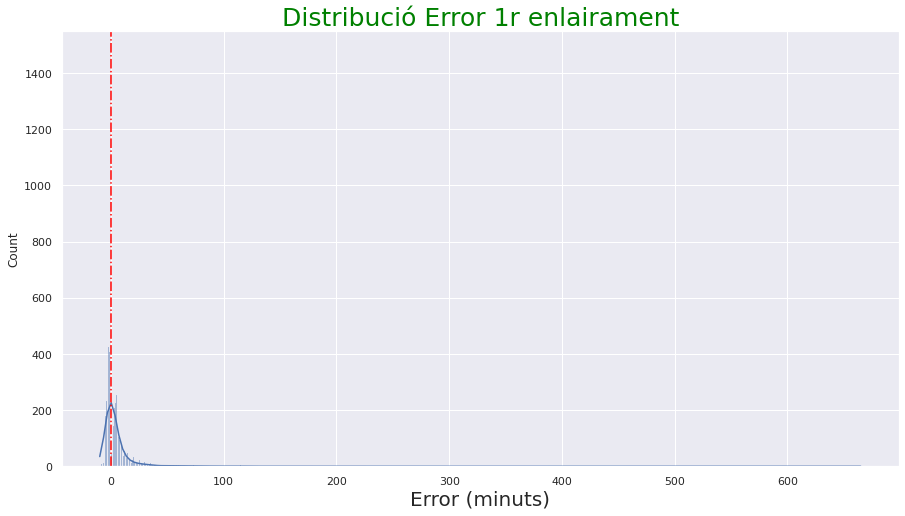

In [69]:
plt.figure(figsize = (15,8))
p= sns.histplot(data= df2.E_Despegue1, kde= True)
p.axvline(x = 0, ymin=0, ymax= 12, color='red', linestyle= 'dashdot') # Objetivo
p.set_title('Distribució Error 1r enlairament', fontsize=25, color='green')
p.set_xlabel("Error (minuts)", fontsize = 20)


Mitjana filtrada =  2.05 minuts


Text(0.5, 0, 'Error (minuts)')

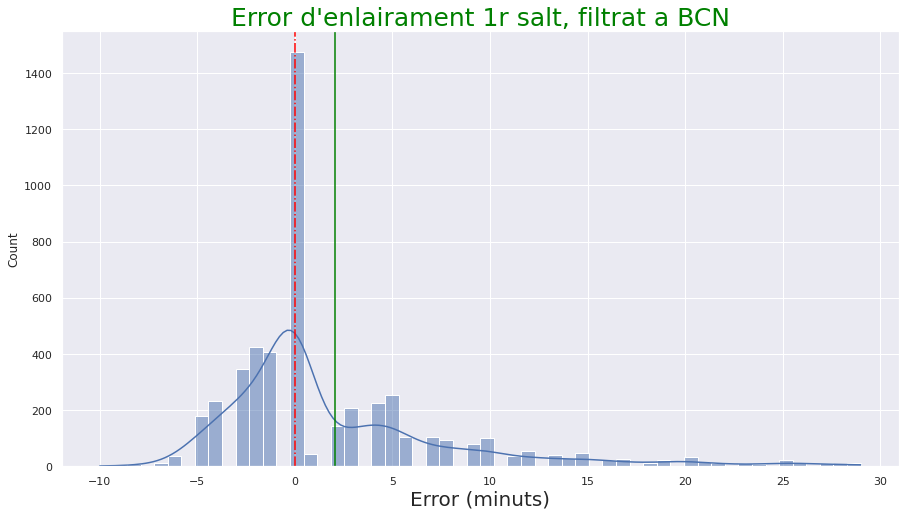

In [70]:
# Eliminar los outliers
df2=df2.copy()
dfEliminarOutliers= ((df2['Secuencia']== 1) & (df2['E_Despegue1']< 30) & (df2['E_Despegue1']> -30))

df2 = df2[dfEliminarOutliers]
#
plt.figure(figsize = (15,8))
p= sns.histplot(data= df2.E_Despegue1, kde= True)
p.set_title("Error d'enlairament 1r salt, filtrat a BCN", fontsize=25, color='green')
mediaFiltrada = round(df2['E_Despegue1'].mean(),2)
p.axvline(mediaFiltrada, 0,12, color = 'green')                       # Media real
p.axvline(x = 0, ymin=0, ymax= 12, color='red', linestyle= 'dashdot') # Objetivo
print()
print('Mitjana filtrada = ', mediaFiltrada, 'minuts')
#print(df2[['Secuencia', 'E_Despegue', 'AeropuertoKey1' ]]) 
p.set_xlabel("Error (minuts)", fontsize = 20)

Text(0.5, 1.0, 'Puntualitat enlairament per hora del dia:')

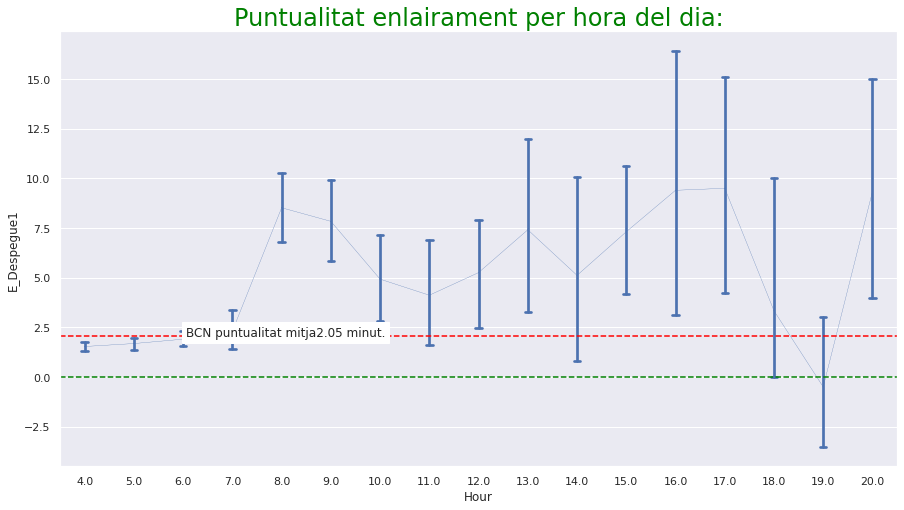

In [71]:
# Intervalos de Confianza por aeropuerto

sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='Hour', y = "E_Despegue1", data= df2, scale=.1, kind = "point", capsize=0.13)

puntualidadBCN = round((df2['E_Despegue1'].mean()),2)#

ax.axhline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN puntualitat mitja"+ str(puntualidadBCN) + ' minut.'
ax.text(puntualidadBCN ,puntualidadBCN , textoBCN, backgroundcolor='w')

ax.set_title('Puntualitat enlairament per hora del dia:', fontsize = 24, color= 'green')

In [72]:
df1

,DATE,STD,STA,ATD,ATA,REG,DEP,ARR,MES,Setmana,DiaSetmana,DiaSetmanaName,Hour,DuracionVueloTeorico1,DuracionVueloReal1,E_Duracion_Vuelo1,E_Puntualidad1,E_Despegue1,Secuencia
0,1 de abril de 2019,2019-04-01 10:30:00,2019-04-01 12:50:00,2019-04-01 10:43:00,2019-04-01 12:55:00,EI-DAC,MXP,OTP,4.0,14.0,0.0,Monday,10.0,140.0,132.0,-8.0,5.0,13.0,1.0
1,1 de abril de 2019,2019-04-01 13:20:00,2019-04-01 15:45:00,2019-04-01 13:40:00,2019-04-01 16:03:00,EI-DAC,OTP,MXP,4.0,14.0,0.0,Monday,13.0,145.0,143.0,-2.0,18.0,20.0,2.0
2,1 de abril de 2019,2019-04-01 16:10:00,2019-04-01 18:00:00,2019-04-01 16:40:00,2019-04-01 18:20:00,EI-DAC,MXP,PMO,4.0,14.0,0.0,Monday,16.0,110.0,100.0,-10.0,20.0,30.0,3.0
3,1 de abril de 2019,2019-04-01 18:45:00,2019-04-01 20:35:00,2019-04-01 18:58:00,2019-04-01 20:35:00,EI-DAC,PMO,MXP,4.0,14.0,0.0,Monday,18.0,110.0,97.0,-13.0,0.0,13.0,4.0
4,1 de abril de 2019,2019-04-01 05:30:00,2019-04-01 07:20:00,2019-04-01 05:30:00,2019-04-01 07:25:00,EI-DAD,OPO,BCN,4.0,14.0,0.0,Monday,5.0,110.0,115.0,5.0,5.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750949,9 de septiembre de 2019,2019-09-09 18:25:00,2019-09-09 20:05:00,2019-09-09 18:21:00,2019-09-09 19:58:00,EI-GXN,TSF,CTA,9.0,37.0,0.0,Monday,18.0,100.0,97.0,-3.0,-7.0,-4.0,6.0
750950,9 de septiembre de 2019,2019-09-09 07:55:00,2019-09-09 10:35:00,2019-09-09 07:49:00,2019-09-09 10:20:00,NaN,BLQ,SVQ,9.0,37.0,0.0,Monday,7.0,160.0,151.0,-9.0,-15.0,-6.0,2909.0
750951,9 de septiembre de 2019,2019-09-09 09:10:00,2019-09-09 10:35:00,2019-09-09 09:10:00,2019-09-09 10:28:00,NaN,ORK,LGW,9.0,37.0,0.0,Monday,9.0,85.0,78.0,-7.0,-7.0,0.0,2910.0
750952,9 de septiembre de 2019,2019-09-09 12:20:00,2019-09-09 13:10:00,2019-09-09 12:20:00,2019-09-09 12:54:00,NaN,TNG,SVQ,9.0,37.0,0.0,Monday,12.0,50.0,34.0,-16.0,-16.0,0.0,2911.0


In [73]:
#Calculo error primer despegue despegue:


In [74]:
df.head()

,DATE,STD,STA,ATD,ATA,REG,DEP,ARR,MES,Setmana,DiaSetmana,DiaSetmanaName,Hour,DuracionVueloTeorico1,DuracionVueloReal1,E_Duracion_Vuelo1,E_Puntualidad1,E_Despegue1,Secuencia
0,1 de abril de 2019,2019-04-01 10:30:00,2019-04-01 12:50:00,2019-04-01 10:43:00,2019-04-01 12:55:00,EI-DAC,MXP,OTP,4.0,14.0,0.0,Monday,10.0,140.0,132.0,-8.0,5.0,13.0,1.0
1,1 de abril de 2019,2019-04-01 13:20:00,2019-04-01 15:45:00,2019-04-01 13:40:00,2019-04-01 16:03:00,EI-DAC,OTP,MXP,4.0,14.0,0.0,Monday,13.0,145.0,143.0,-2.0,18.0,20.0,2.0
2,1 de abril de 2019,2019-04-01 16:10:00,2019-04-01 18:00:00,2019-04-01 16:40:00,2019-04-01 18:20:00,EI-DAC,MXP,PMO,4.0,14.0,0.0,Monday,16.0,110.0,100.0,-10.0,20.0,30.0,3.0
3,1 de abril de 2019,2019-04-01 18:45:00,2019-04-01 20:35:00,2019-04-01 18:58:00,2019-04-01 20:35:00,EI-DAC,PMO,MXP,4.0,14.0,0.0,Monday,18.0,110.0,97.0,-13.0,0.0,13.0,4.0
4,1 de abril de 2019,2019-04-01 05:30:00,2019-04-01 07:20:00,2019-04-01 05:30:00,2019-04-01 07:25:00,EI-DAD,OPO,BCN,4.0,14.0,0.0,Monday,5.0,110.0,115.0,5.0,5.0,0.0,1.0


Text(0.5, 0, 'Error (minuts)')

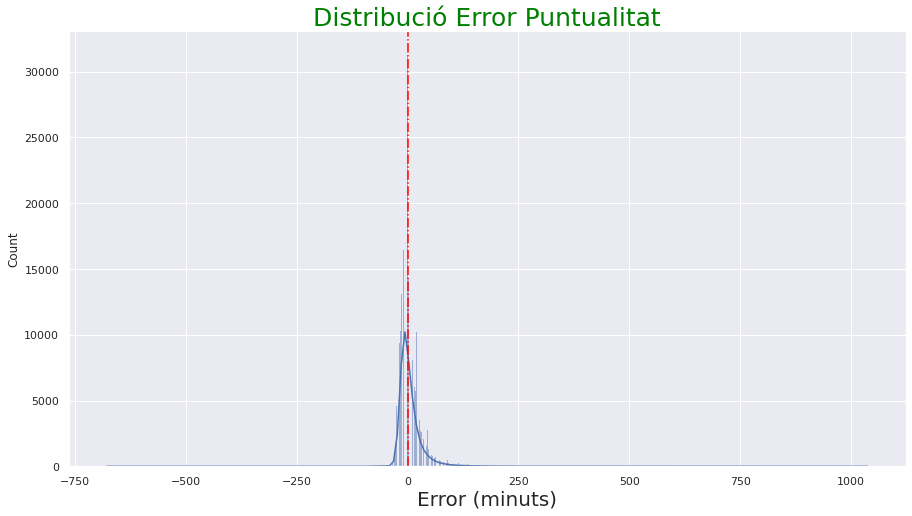

In [75]:
plt.figure(figsize = (15,8))
p= sns.histplot(data= df.E_Puntualidad1, kde= True)
p.axvline(x = 0, ymin=0, ymax= 12, color='red', linestyle= 'dashdot') # Objetivo
p.set_title('Distribució Error Puntualitat', fontsize=25, color='green')
p.set_xlabel("Error (minuts)", fontsize = 20)


Mitjana filtrada =  -1.47 minuts


Text(0.5, 0, 'Error (minuts)')

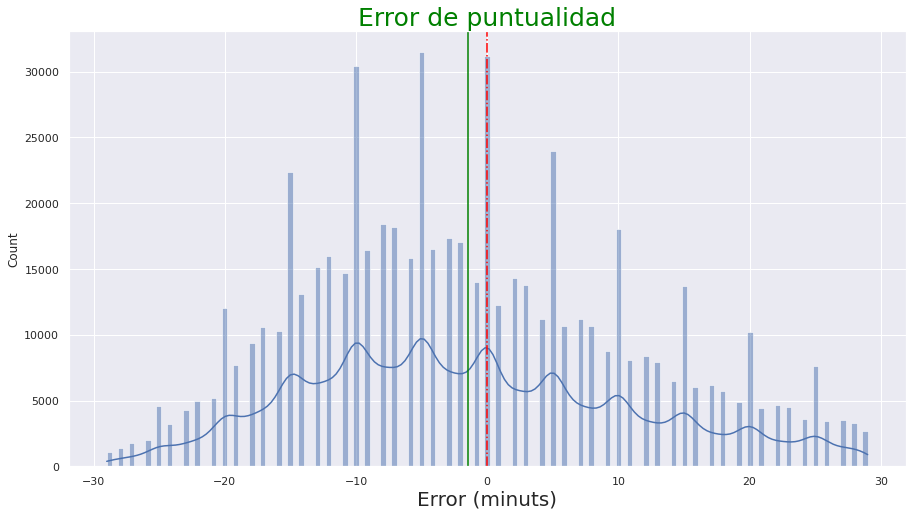

In [76]:
# Eliminar los outliers
df2=df.copy()
dfEliminarOutliers= ( (df2['E_Puntualidad1']< 30) & (df2['E_Puntualidad1']> -30))

df2 = df2[dfEliminarOutliers]
#
plt.figure(figsize = (15,8))
p= sns.histplot(data= df2.E_Puntualidad1, kde= True)
p.set_title("Error de puntualitat filtrat", fontsize=25, color='green')

mediaFiltrada = round(df2['E_Puntualidad1'].mean(),2)
p.axvline(mediaFiltrada, 0,12, color = 'green')                       # Media real
p.axvline(x = 0, ymin=0, ymax= 12, color='red', linestyle= 'dashdot') # Objetivo
print()
print('Mitjana filtrada = ', mediaFiltrada, 'minuts')
#print(df2[['Secuencia', 'E_Despegue', 'AeropuertoKey1' ]]) 
p.set_xlabel("Error (minuts)", fontsize = 20)

Text(0.5, 1.0, 'Puntualitat enlairament per salt del dia:')

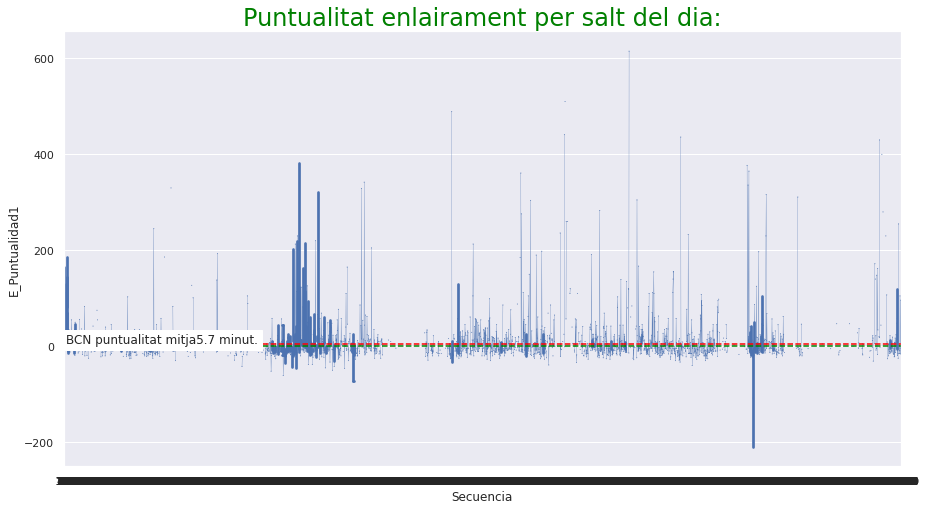

In [83]:
# Intervals de Confianza per salt

sns.set_theme(style="darkgrid")
#tips = sns.df1("tips")
sns.set(rc = {'figure.figsize':(15,8)})      
# Tamaño de la imagen
ax = sns.pointplot(x='Secuencia', y = "E_Puntualidad1", data= df, scale=.1, kind = "point", capsize=0.13)

puntualidadBCN = round((df['E_Puntualidad1'].mean()),2)#

ax.axhline(puntualidadBCN, color="red", linestyle = '--', label="ooas")       # Linea 0 verde
ax.axhline(0, color="green", linestyle = '--')


textoBCN = "BCN puntualitat mitja"+ str(puntualidadBCN) + ' minut.'
ax.text(puntualidadBCN+5 ,puntualidadBCN , textoBCN, backgroundcolor='w')

ax.set_title('Puntualitat enlairament per salt del dia:', fontsize = 24, color= 'green')

#df['E_acumulado_Total'] = df[f'E_Despegue_Total'] + df[f'E_Duracion_Vuelo_Total'] + df[f'E_tierra_Total'] 

In [ ]:
guardar = 'No'
# Guardar excel
if guardar != 'No':
  nombreFichero = "D:\Documentos D\02.- Datos Vueling\Ryainair2019_" + Hoja + '_'+ str(fecha) + ".xlsx"

  df3.to_excel(nombreFichero)
  print()
  print('Guardado fichero : ', nombreFichero)
  print()
else:
  print('No guardado')

In [78]:
df.Secuencia.max()

4149.5

In [84]:
df2.Secuencia.max()

4148.0